In [617]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import math
import warnings
warnings.filterwarnings('ignore')

In [618]:
dataset = pd.read_csv("datasets/iris.txt", delim_whitespace=True, header=None)

## Real KMeans
Just on iris.

In [619]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

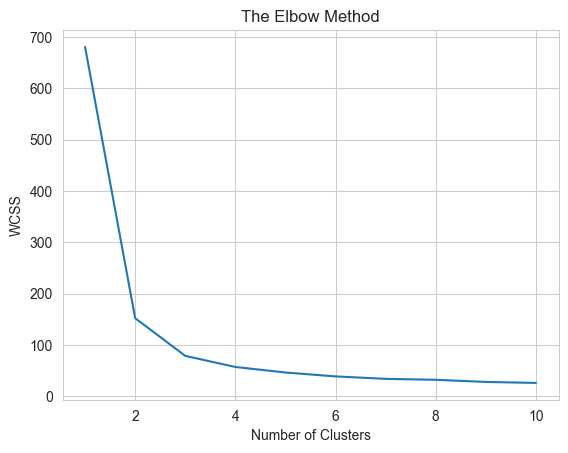

In [620]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [621]:
clusters = 3
kmeans = KMeans(n_clusters = clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
dataset[4] = kmeans.fit_predict(dataset)

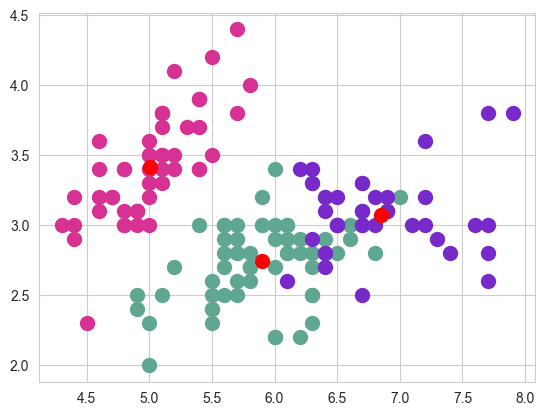

In [622]:
for i in range(clusters):
    cluster = dataset.loc[dataset[4] == i]
    plt.scatter(cluster[0],cluster[1], s = 100, c = (np.random.random(), np.random.random(), np.random.random()))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

## My KMeans 

In [623]:
#Finding range of points on graph
def dataminmax(dataset1):
    x = [dataset1[0].min(),dataset1[0].max()]
    y = [dataset1[1].min(),dataset1[1].max()]
    return x, y

#Choose number within range of points on graph
def randcentroid(krange):
    return round(random.uniform(krange[0][0],krange[0][1]),2),round(random.uniform(krange[1][0],krange[1][1]),2)

#Raw distance between two points
def distance(point1,point2):
    return abs(point1[0]-point2[0]),abs(point1[1]-point2[1])

In [624]:
def kkmeans(clusters,iris):
    centroids = np.empty(shape=(clusters,2))
    #Find bounds of data
    mm = dataminmax(iris)
    #Closest Centroid [number]
    iris[4] = np.nan 

    ex_iter = 0
    # Generate Starting Centroids
    for i in range(clusters):
        centroids[i] = randcentroid(mm)

    # Find which centroid each point is closest to
    for iter in range(20):
        ex_iter+=1
        flag = True
        #To store Cluster Average Location
        clusteravg = np.zeros(shape=(clusters,3))
        for f in range(len(iris)):
            nearest = 99999 #arbitrary large number
            for i in range(clusters):
                point = distance(iris.iloc[f],centroids[i])
                #Euclidian Distance
                eucdist = math.sqrt((point[0] ** 2) + (point[1] ** 2))
                if(eucdist < nearest):
                    nearest = eucdist
                    iris.at[f,4] = i

        #Find average location of cluster
        for f in range(len(iris)):
            indx = int(iris.iloc[f][4])
            clusteravg[indx] =  [clusteravg[indx][0]+iris.iloc[f][0],clusteravg[indx][1]+iris.iloc[f][1],clusteravg[indx][2]+1]
        for i in range(clusters):
            # Set flag to break if less than .001 ( I invert it to detect if any are greater)
            if((abs(centroids[i] - [round(clusteravg[i][0]/clusteravg[i][2],2),round(clusteravg[i][1]/clusteravg[i][2],2)])[0]) >= 0.001 or abs((centroids[i] - [round(clusteravg[i][0]/clusteravg[i][2],2),round(clusteravg[i][1]/clusteravg[i][2],2)])[1]) >= 0.001):
                flag = False
            centroids[i] = [round(clusteravg[i][0]/clusteravg[i][2],2),round(clusteravg[i][1]/clusteravg[i][2],2)]
        if flag:
            break
    # Printing Stuff, Graph
    print(f'Saved {20-ex_iter} iterations from early stop. ({ex_iter} iterations run total)')
    #Points Cluster Assignment (Starting at 0)
    print(iris.loc[:,4].tolist())
    for i in range(clusters):
        cluster = iris.loc[iris[4] == i]
        print(f'Cluster {i} size: {len(cluster)}')
        print(f'Cluster {i} mean: {centroids[i][0]},{centroids[i][1]}')
        plt.scatter(cluster[0],cluster[1], s = 100, c = (np.random.random(), np.random.random(), np.random.random()))
        plt.scatter(centroids[i][0], centroids[i][1], s = 100, c = 'red', label = 'Centroids')
    

Saved 7 iterations from early stop. (13 iterations run total)
[0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 1.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 2.0, 0.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 1.0, 2.0]
Cluster 0 size: 53
Cluster 0 mean: 5.77,2.69
Cluster 1 size: 47
Cluster 1 mean: 6.81,3.07
Cluster 2 size: 50
Cluster 2 mean: 5.01,3.42


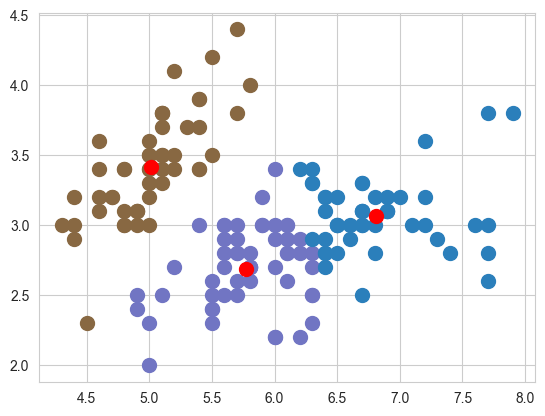

In [661]:
dataset = pd.read_csv("datasets/iris.txt", delim_whitespace=True, header=None)
clusters = 3
kkmeans(clusters,dataset)

Saved 7 iterations from early stop. (13 iterations run total)
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.

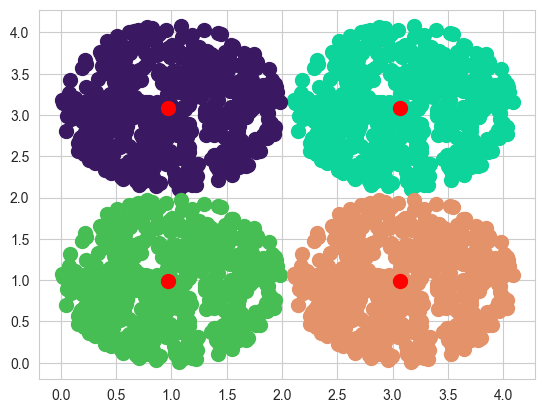

In [626]:
dataset = pd.read_csv("datasets/fourcircles.txt", delim_whitespace=True, header=None)
clusters = 4
kkmeans(clusters,dataset)

Saved 0 iterations from early stop. (20 iterations run total)
[3.0, 6.0, 0.0, 6.0, 4.0, 0.0, 3.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, 0.0, 3.0, 4.0, 4.0, 1.0, 0.0, 1.0, 5.0, 3.0, 6.0, 1.0, 4.0, 6.0, 6.0, 4.0, 2.0, 4.0, 5.0, 6.0, 0.0, 1.0, 4.0, 6.0, 5.0, 3.0, 1.0, 4.0, 3.0, 5.0, 4.0, 1.0, 6.0, 4.0, 4.0, 4.0, 3.0, 6.0, 4.0, 3.0, 3.0, 0.0, 6.0, 3.0, 2.0, 5.0, 6.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 6.0, 6.0, 3.0, 2.0, 4.0, 2.0, 5.0, 0.0, 6.0, 5.0, 4.0, 1.0, 3.0, 0.0, 2.0, 6.0, 3.0, 0.0, 2.0, 4.0, 5.0, 3.0, 1.0, 3.0, 4.0, 1.0, 3.0, 2.0, 1.0, 5.0, 5.0, 1.0, 0.0, 5.0, 4.0, 3.0, 0.0, 4.0, 2.0, 2.0, 2.0, 1.0, 0.0, 5.0, 2.0, 1.0, 6.0, 6.0, 1.0, 1.0, 0.0, 6.0, 2.0, 1.0, 5.0, 2.0, 4.0, 6.0, 3.0, 1.0, 6.0, 4.0, 4.0, 6.0, 1.0, 6.0, 2.0, 6.0, 4.0, 5.0, 2.0, 6.0, 3.0, 1.0, 6.0, 6.0, 0.0, 1.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 1.0, 6.0, 1.0, 3.0, 5.0, 2.0, 5.0, 3.0, 2.0, 1.0, 4.0, 4.0, 2.0, 3.0, 6.0, 1.0, 2.0, 2.0, 5.0, 4.0, 2.0, 5.0, 2.0, 1.0, 1.0, 2.0, 5.0, 2.0, 1.0, 5.0, 0.0, 3.0, 3.0, 1.0, 5.0, 2.0, 3.0, 1.

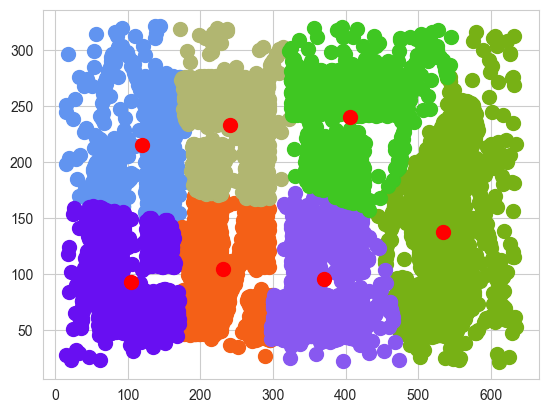

In [627]:
dataset = pd.read_csv("datasets/t4.8k.txt", delim_whitespace=True, header=None)
clusters = 7
kkmeans(clusters,dataset)

Saved 14 iterations from early stop. (6 iterations run total)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

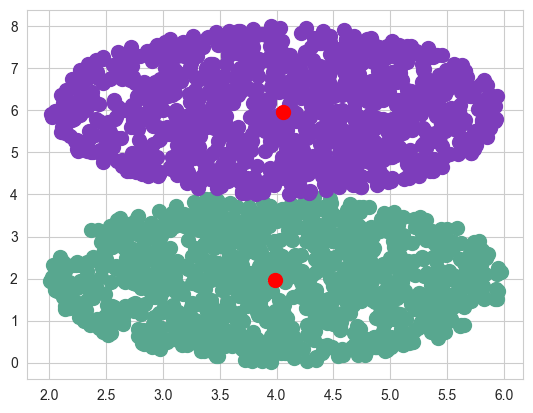

In [628]:
dataset = pd.read_csv("datasets/twocircles.txt", delim_whitespace=True, header=None)
clusters = 2
kkmeans(clusters,dataset)

Saved 12 iterations from early stop. (8 iterations run total)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

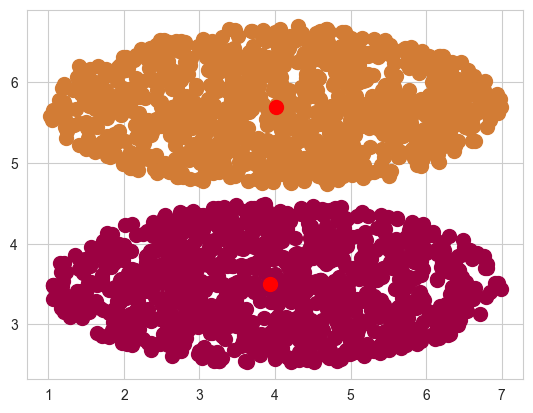

In [656]:
dataset = pd.read_csv("datasets/twoellipses.txt", delim_whitespace=True, header=None)
clusters = 2
kkmeans(clusters,dataset)